## Clustering Call-of-Duty players using the K-Means algorithm

This is a link to the dataset used: https://www.kaggle.com/aishahakami/call-of-duty-players

In [319]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Seaborn is prepared for plotting data and the dataset is read. The dataset page mentions that the 'name' column is unique, so it is used as the indexing column.

In [320]:
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
dataset = pd.read_csv('cod.csv',index_col='name')

Inspecting the dataset top 5 rows and the columns and removing the duplicate elements (if any).

In [321]:
dataset.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
name,,,,,,,,,,,,,,,,,,
RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [322]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, RggRt45#4697369 to TomasFJ_05#2711069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kills           1558 non-null   int64  
 2   kdRatio         1558 non-null   float64
 3   killstreak      1558 non-null   int64  
 4   level           1558 non-null   int64  
 5   losses          1558 non-null   int64  
 6   prestige        1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  xp              1558 non-null   int64  
 15  scorePerMinute  1558 non-null   float64
 16  shots           1558 non-null   int64  
 17  deaths    

In [323]:
dataset.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [324]:
dataset.drop_duplicates(inplace=True)

Based on the column description, the rows with 'timePlayed' = 0 are removed, as these rows do not provide any useful information.
Also, 3 new columns are created: hit_rate, miss_rate and headshot_rate. Hits, misses and headshots are divided by number of total shots and the total amount of time played.

In [325]:
dataset.drop(dataset[dataset.timePlayed == 0].index, inplace=True)

dataset['hit_rate'] = (dataset.hits/dataset.shots)/dataset.timePlayed
dataset['miss_rate'] = (dataset.misses/dataset.shots)/dataset.timePlayed
dataset['headshot_rate'] = (dataset.headshots/dataset.shots)/dataset.timePlayed

dataset.replace([np.inf, -np.inf, np.nan], 0, inplace=True)


del dataset['hits']
del dataset['misses']
del dataset['shots']
del dataset['headshots']
del dataset['timePlayed']
del dataset['averageTime']

dataset.head(n=10)

,wins,kills,kdRatio,killstreak,level,losses,prestige,gamesPlayed,assists,xp,scorePerMinute,deaths,hit_rate,miss_rate,headshot_rate
name,,,,,,,,,,,,,,,
JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,0,700,0.000000,16,0.000000,0.000000,0.000000
bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,1,48300,0.000000,64,0.000000,0.000000,0.000000
JNaCo#5244172,3,2,0.400000,0,1,0,0,0,0,1150,0.000000,5,0.000000,0.000000,0.000000
gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,0,1000,0.000000,10,0.000000,0.000000,0.000000
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,588,6063,3932335,255.672035,25321,0.000178,0.000554,0.000009
bdooory_ab#7095171,4,162,0.632812,4,6,2,0,4,68,24485,265.500000,256,0.013138,0.111862,0.000810
ahevepluto#3505304,186,1898,0.569628,13,37,7,2,150,488,458269,180.379636,3332,0.000206,0.001612,0.000020
MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,864,4029,4269370,198.844226,21032,0.000082,0.000328,0.000004
RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,15,138,72765,253.677273,786,0.003876,0.018851,0.000156


In [326]:
# Extract the values of the DataFrame
data = dataset.iloc[:,1:].values

Two pipelines are created: preprocessor and clusterer. The preprocessor pipeline standardizes the data and uses PCA for dimensionality reduction.
The clusterer pipeline is used to apply the K-Means algorithm.

In [327]:

preprocessor = Pipeline(
    [
        ("standardize", StandardScaler()),
        ("pca", PCA(n_components=2,random_state=42)),
    ]
)

clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [328]:
# Create the overal pipeline
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [329]:
# process the pipeline
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('standardize', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [330]:
# pass the data throught the preprocessor pipeline
preprocessed_data = pipe["preprocessor"].transform(data)

Looping over different number of components for PCA and number of clusters in K-Means, and computing the Silhouette coefficient for each experiment.

In [331]:
silhouette_scores = []
inertia_scores = []
for n in range(2, 6):
    for k in range(2, 6):
        pipe["preprocessor"]["pca"].n_components = n
        pipe["clusterer"]["kmeans"].n_clusters = k
        pipe.fit(data)
        silhouette_coef = silhouette_score(
             pipe["preprocessor"].transform(data),
             pipe["clusterer"]["kmeans"].labels_,)

        silhouette_scores.append([n,k,silhouette_coef])

df = pd.DataFrame(silhouette_scores, columns=['n','k','score'] )

Plotting the calculated Silhouette coefficients for different choices of the parameters.

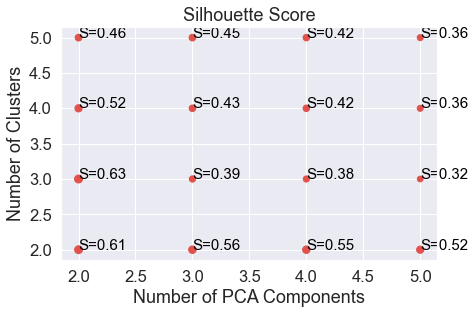

In [332]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = df['n'].values
y = df['k'].values
z = df['score'].values

ax.scatter(x,y,s=z*100)
ax.set_xlabel('Number of PCA Components')
ax.set_ylabel('Number of Clusters')
ax.set_title('Silhouette Score')
for i in range(len(z)):
    ax.text(x[i],y[i],f'S={z[i].round(2)}',size=15, zorder=1, color='k')

Based on the results, the experiment with the highest Silhouette value is chosen (2 PCA components and 3 clusters).
In order to name the 3 categories, the level column of the dataset is used. First, let's plot a histogram of levels.

<AxesSubplot:xlabel='level', ylabel='Count'>

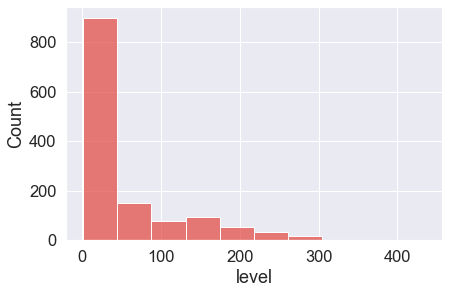

In [333]:
sns.histplot(dataset.level, bins=10)


In [334]:

# labeling the dataset based on the level value.

conditions = [
    (dataset['level'] < 50),
    (dataset['level'] >= 50) & (dataset['level'] < 150),
    (dataset['level'] >= 150)]
choices = ['Level 0', 'Level 1', 'Level 2']
lbls = np.select(conditions, choices, default=0)

K-Means is run for the optimum choice of PCA components and the number of clusters, and the resulting categories are compared to the players' level to put players into 3 categories : Professional, Intermediate and Beginner.

/opt/anaconda3/envs/main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Comparing resulted categories with the player level.'),
 Text(0.5, 0, 'PCA component 1'),
 Text(0, 0.5, 'PCA component 2')]

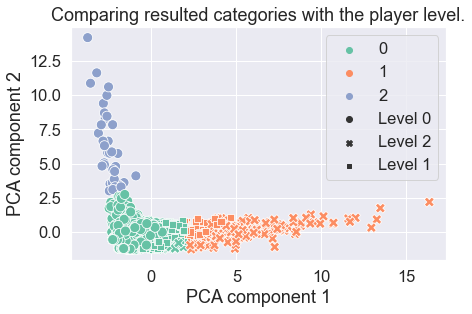

In [335]:
pipe["preprocessor"]["pca"].n_components = 2
pipe["clusterer"]["kmeans"].n_clusters = 3
pipe.fit(data)
output_labels = pipe["clusterer"]["kmeans"].labels_


sns.scatterplot(preprocessed_data[:,0], preprocessed_data[:,1], hue=output_labels, style=lbls, s=100, palette="Set2").set(title='Comparing resulted categories with the player level.',xlabel='PCA component 1', ylabel='PCA component 2')

In [316]:
# Creating names for the categories
myDict = {0: "Intermediate", 1: "Professional", 2: "Beginner"}
dataset['Category'] = [myDict[x] for x in output_labels]





